In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import imageio
import glob

https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

T SNE



In [4]:
df = pd.read_csv('data/styles.csv', error_bad_lines=False)

In [5]:
df.set_index('id', inplace=True)

In [6]:
df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
id,,,,,,,,,
15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [7]:
# from os import listdir
# from os.path import isfile, join
# pic_files = [f for f in listdir('data/fashion-product-images-small/images') if isfile(join('data/fashion-product-images-small/images', f))]

In [8]:
# pic_files

In [14]:
path = r'/Users/Kelly/galvanize/week8/data/images'
files = glob.glob(path + "/*.jpg")
file_series = pd.Series(files, dtype=object)
idx_series = file_series.str.replace('/Users/Kelly/galvanize/week8/data/images/', '')

In [15]:
pic_arr = np.array(files)

In [34]:
def get_pixels(files, max_n=None, verbose=True):
    n_images = max_n or len(files)
    r = np.zeros((n_images,14400))
    bad_list = []
    for i in range(n_images):
        if verbose and i%100==0:
            print( f"{i}/{len(files)}; {100*(i+1)/len(files):0.2f}%%" )
        img = imageio.imread(files[i])
        flat = np.array(img).flatten()
        if len(flat) == 14400:   
            r[i,:] = flat  
#        else: 
#            bad_list.append(files[i])
    return r

In [66]:
images_arr = get_pixels(pic_arr)

0/44441; 0.00%%
100/44441; 0.23%%
200/44441; 0.45%%
300/44441; 0.68%%
400/44441; 0.90%%
500/44441; 1.13%%
600/44441; 1.35%%
700/44441; 1.58%%
800/44441; 1.80%%
900/44441; 2.03%%
1000/44441; 2.25%%
1100/44441; 2.48%%
1200/44441; 2.70%%
1300/44441; 2.93%%
1400/44441; 3.15%%
1500/44441; 3.38%%
1600/44441; 3.60%%
1700/44441; 3.83%%
1800/44441; 4.05%%
1900/44441; 4.28%%
2000/44441; 4.50%%
2100/44441; 4.73%%
2200/44441; 4.95%%
2300/44441; 5.18%%
2400/44441; 5.40%%
2500/44441; 5.63%%
2600/44441; 5.85%%
2700/44441; 6.08%%
2800/44441; 6.30%%
2900/44441; 6.53%%
3000/44441; 6.75%%
3100/44441; 6.98%%
3200/44441; 7.20%%
3300/44441; 7.43%%
3400/44441; 7.65%%
3500/44441; 7.88%%
3600/44441; 8.10%%
3700/44441; 8.33%%
3800/44441; 8.55%%
3900/44441; 8.78%%
4000/44441; 9.00%%
4100/44441; 9.23%%
4200/44441; 9.45%%
4300/44441; 9.68%%
4400/44441; 9.90%%
4500/44441; 10.13%%
4600/44441; 10.35%%
4700/44441; 10.58%%
4800/44441; 10.80%%
4900/44441; 11.03%%
5000/44441; 11.25%%
5100/44441; 11.48%%
5200/44441; 11.70

39900/44441; 89.78%%
40000/44441; 90.01%%
40100/44441; 90.23%%
40200/44441; 90.46%%
40300/44441; 90.68%%
40400/44441; 90.91%%
40500/44441; 91.13%%
40600/44441; 91.36%%
40700/44441; 91.58%%
40800/44441; 91.81%%
40900/44441; 92.03%%
41000/44441; 92.26%%
41100/44441; 92.48%%
41200/44441; 92.71%%
41300/44441; 92.93%%
41400/44441; 93.16%%
41500/44441; 93.38%%
41600/44441; 93.61%%
41700/44441; 93.83%%
41800/44441; 94.06%%
41900/44441; 94.28%%
42000/44441; 94.51%%
42100/44441; 94.73%%
42200/44441; 94.96%%
42300/44441; 95.18%%
42400/44441; 95.41%%
42500/44441; 95.63%%
42600/44441; 95.86%%
42700/44441; 96.08%%
42800/44441; 96.31%%
42900/44441; 96.53%%
43000/44441; 96.76%%
43100/44441; 96.98%%
43200/44441; 97.21%%
43300/44441; 97.43%%
43400/44441; 97.66%%
43500/44441; 97.88%%
43600/44441; 98.11%%
43700/44441; 98.33%%
43800/44441; 98.56%%
43900/44441; 98.78%%
44000/44441; 99.01%%
44100/44441; 99.23%%
44200/44441; 99.46%%
44300/44441; 99.68%%
44400/44441; 99.91%%


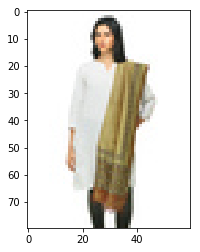

In [74]:
plt.imshow( images_arr[4].reshape(80,60,3)/255 )

In [81]:
# #np.savez( "images_arr.npz", images_arr )

#foo = np.load("images_arr.npz")

In [93]:
#images_arr = foo["arr_0"]

In [95]:
#pic_df0 = pd.DataFrame(images_arr, index=idx_series.astype(int), dtype='int')

In [96]:
#pic_df = pic_df0[pic_df0.notnull]

In [97]:
# pic_idx = set(pic_df.index)
# df_idx = set(df.index)

In [98]:
# df = df[df.index.isin(pic_idx)]
# pic_df = pic_df[pic_df.index.isin(df_idx)]

In [99]:
# pic_df.head()

In [100]:
# xx = np.array(pic_df.iloc[0,:].astype(int))
# tt = xx.reshape(80, 60, 3)
# # tt.shape

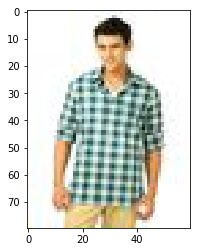

In [103]:
#plt.imshow(tt)
plt.imshow( images_arr[0].reshape(80,60,3)/255 )

In [104]:
df.columns

Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [105]:
df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
id,,,,,,,,,
15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [106]:
df['masterCategory'].value_counts()

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [107]:
df['gender'].value_counts()

Men       22165
Women     18632
Unisex     2164
Boys        830
Girls       655
Name: gender, dtype: int64

In [108]:
df[df['masterCategory']=='Apparel'].groupby('subCategory').count()['masterCategory']

subCategory
Apparel Set                   106
Bottomwear                   2694
Dress                         478
Innerwear                    1808
Loungewear and Nightwear      470
Saree                         427
Socks                          12
Topwear                     15405
Name: masterCategory, dtype: int64

In [109]:
df[df['masterCategory']=='Accessories'].groupby('subCategory').count()['masterCategory']

subCategory
Accessories            143
Bags                  3055
Belts                  811
Cufflinks              108
Eyewear               1073
Gloves                  20
Headwear               293
Jewellery             1080
Mufflers                38
Perfumes                 1
Scarves                118
Shoe Accessories        24
Socks                  686
Sports Accessories       3
Stoles                  90
Ties                   258
Umbrellas                6
Wallets                933
Watches               2542
Water Bottle             7
Name: masterCategory, dtype: int64

In [110]:
df[df['masterCategory']=='Footwear'].groupby('subCategory').count()['masterCategory']

subCategory
Flip Flops     915
Sandal         963
Shoes         7344
Name: masterCategory, dtype: int64

In [111]:
df[df['masterCategory']=='Apparel'].groupby(['subCategory','articleType']).count()['masterCategory']

subCategory               articleType       
Apparel Set               Clothing Set             8
                          Kurta Sets              94
                          Swimwear                 4
Bottomwear                Capris                 175
                          Churidar                30
                          Jeans                  609
                          Jeggings                34
                          Leggings               177
                          Patiala                 38
                          Rain Trousers            2
                          Salwar                  32
                          Salwar and Dupatta       7
                          Shorts                 545
                          Skirts                 128
                          Stockings               32
                          Swimwear                13
                          Tights                   9
                          Track Pants            304
 

In [112]:
wearable_list = ['Apparel', 'Accessories', 'Footwear']

In [193]:
wearable_ids = df['masterCategory'].isin(wearable_list).index

In [194]:
wearable_ids

Int64Index([15970, 39386, 59263, 21379, 53759,  1855, 30805, 26960, 29114,
            30039,
            ...
            30614, 13496, 55283, 12544, 42234, 17036,  6461, 18842, 46694,
            51623],
           dtype='int64', name='id', length=44446)

In [195]:
image_matrix_row_labels = idx_series.str.split(".").map(lambda x:x[0]).astype(int)

In [201]:
wearable_rows = []
for wearable_id in wearable_ids:
    wearable_row = image_matrix_row_labels[image_matrix_row_labels==wearable_id].index[0]
    wearable_rows.append( wearable_row )

IndexError: index 0 is out of bounds for axis 0 with size 0

In [196]:
image_matrix_row_labels

0         9733
1        14147
2        52112
3         6400
4        34297
5        24084
6        12536
7        54563
8        15259
9        35189
10       44770
11        4217
12       47279
13       36480
14       16750
15       50705
16       26693
17       37946
18        3578
19       40516
20       10321
21       16988
22       59047
23        2666
24       41608
25       46167
26        5109
27       46601
28       11981
29       20584
         ...  
44411    51364
44412    17331
44413     2119
44414    10338
44415    27594
44416    16991
44417    39972
44418    41611
44419    26852
44420     5110
44421    37787
44422    18764
44423    51402
44424    17457
44425    36499
44426    47260
44427    48153
44428    16749
44429    57073
44430    11026
44431     3561
44432    58340
44433    43006
44434    25383
44435    53215
44436    15240
44437     8434
44438    44769
44439     7707
44440     6419
Length: 44441, dtype: int64

In [169]:
(image_matrix_row_labels==9733).index[0]

0

In [114]:
wear_idx = list(wearable_df.index)
wear_pics = pic_df[pic_df.index.isin(wear_idx)]

NameError: name 'pic_df' is not defined

In [133]:
wearable_locations = [df.index.get_loc(x) for x in wear_idx]

In [135]:
wearable_arr = images_arr[ wearable_locations ]

IndexError: index 44441 is out of bounds for axis 0 with size 44441

In [93]:
wear_pics

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
9733,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
14147,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
52112,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6400,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
34297,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
24084,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12536,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
54563,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
15259,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
35189,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [30]:
set(wear_pics.index) == set(wearable_df.index)

True

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
clust = AgglomerativeClustering(n_clusters=3).fit(wear_pics[0:1000])

In [49]:
clust

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [50]:
cc = clust.labels_

In [76]:
aa = wear_pics[0:1000].index
bb = wearable_df.loc[aa,:]
bb

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
9733,Men,Apparel,Topwear,Shirts,Green,Fall,2011.0,Casual,Indian Terrain Men Chase Green Shirts
14147,Men,Accessories,Cufflinks,Cufflinks,Steel,Fall,2011.0,Formal,Belmonte Men Bright Assorted Steel Cufflinks
52112,Women,Apparel,Topwear,Kurtis,Multi,Summer,2012.0,Ethnic,Myntra Women Multi Coloured Kurti
6400,Men,Footwear,Sandal,Sandals,Black,Summer,2011.0,Casual,Lotto Men Laos Black Grey Floater
34297,Women,Apparel,Topwear,Dupatta,Gold,Summer,2012.0,Ethnic,Fabindia Women Gold Tussar Dupatta
24084,Women,Footwear,Shoes,Heels,Bronze,Winter,2015.0,Casual,Catwalk Women Bronze Flats
12536,Women,Apparel,Topwear,Sweatshirts,Black,Fall,2011.0,Casual,Puma Women Solid Black Sweatshirts
54563,Women,Apparel,Topwear,Tunics,White,Summer,2012.0,Casual,Global Desi Women White Printed Tunic
15259,Women,Footwear,Shoes,Casual Shoes,White,Fall,2011.0,Casual,ADIDAS Originals Women Top Ten low Sleek White...
35189,Unisex,Accessories,Bags,Backpacks,Red,Summer,2015.0,Casual,Wildcraft Unisex Red Solid Backpack


In [80]:
bb['category_group'] = bb['masterCategory'].apply(lambda x: 0 if x =='Apparel' else (1 if x=='Accessories' else 2))
bb['cluster_group'] = cc
dd = bb[['category_group', 'cluster_group']]

In [82]:
dd[dd['category_group']==0].groupby('cluster_group').count()

,category_group
cluster_group,
0,425
1,70
2,2


In [83]:
dd[dd['category_group']==1].groupby('cluster_group').count()

,category_group
cluster_group,
0,70
1,195
2,6


In [84]:
dd[dd['category_group']==2].groupby('cluster_group').count()

,category_group
cluster_group,
0,6
1,224
2,2


In [85]:
clust2 = AgglomerativeClustering(n_clusters=2).fit(wear_pics[0:1000])

In [86]:
aa2 = wear_pics[0:1000].index
bb2 = wearable_df.loc[aa2,:]
cc2 = clust2.labels_

In [88]:
bb2['category_group'] = bb2['masterCategory'].apply(lambda x: 0 if x =='Apparel' else 1)
bb2['cluster_group'] = cc2
dd2 = bb2[['category_group', 'cluster_group']]

In [89]:
dd2[dd2['category_group']==0].groupby('cluster_group').count()

,category_group
cluster_group,
0,427
1,70


In [90]:
dd2[dd2['category_group']==1].groupby('cluster_group').count()

,category_group
cluster_group,
0,84
1,419


In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage, fclusterdata, cophenet
#from scipy.spatial.distance import dist

In [116]:
Z = linkage(wear_pics[0:3000], 'complete')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [75.0, 75.0, 93.75, 93.75],
  [28.125, 28.125, 84.375, 84.375]],
 'dcoord': [[0.0, 15813.77823292081, 15813.77823292081, 0.0],
  [0.0, 17011.76616345287, 17011.76616345287, 15813.77823292081],
  [0.0, 15747.385116266129, 15747.385116266129, 0.0],
  [0.0, 16252.16591719393, 16252.16591719393, 15747.385116266129],
  [0.0, 17264.135744369018, 17264.135744369018, 16252.16591719393],
  [17011.76616345287,
   18744.139003966015,
   18744.139003966015,
   17264.135744369018],
  [0.0, 15773.553404353757, 15773.553404353757, 0.0],
  [0.0, 16950.556687023585, 16950.556687023585, 15773.553404353757],
  [0.0, 17417.880927368864, 17417.880927368864, 16950.556687023585],
  [0.0, 21505.603990588126, 21505.603990588126, 17417.88092736

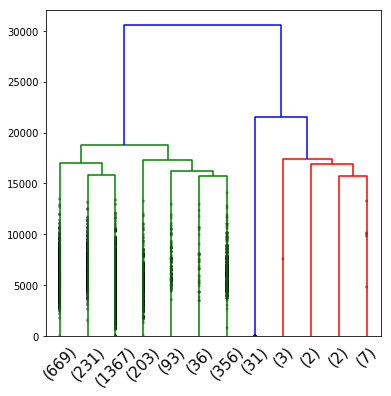

In [121]:
plt.figure(figsize=(6,6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)

In [118]:
Z2 = linkage(wear_pics[0:3000], 'ward')

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [12.5, 12.5, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [65.0, 65.0, 91.25, 91.25],
  [55.0, 55.0, 78.125, 78.125],
  [26.25, 26.25, 66.5625, 66.5625]],
 'dcoord': [[0.0, 57896.95806492854, 57896.95806492854, 0.0],
  [0.0, 72229.05998878936, 72229.05998878936, 57896.95806492854],
  [0.0, 104771.8397594494, 104771.8397594494, 0.0],
  [72229.05998878936,
   114163.51576558308,
   114163.51576558308,
   104771.8397594494],
  [0.0, 61055.728619963316, 61055.728619963316, 0.0],
  [0.0, 80175.62843942312, 80175.62843942312, 0.0],
  [0.0, 83870.45764179341, 83870.45764179341, 80175.62843942312],
  [61055.728619963316,
   108635.61319071666,
   108635.61319071666,
   83870.45764179341],
  [0.0, 124248.71005286061, 124248.71005286061, 108635.61319071666],
  [0.0, 192031.05537051935, 192031.05537051935, 124248.71

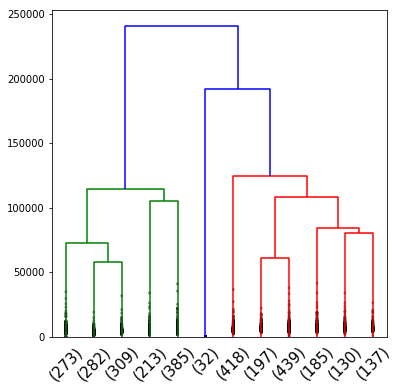

In [120]:
plt.figure(figsize=(6,6))
dendrogram(Z2, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)

In [140]:
W = fclusterdata(Z2, t=1)

In [142]:
W.shape

(2999,)

In [145]:
import seaborn as sns
from time import time
from sklearn.manifold import TSNE
%matplotlib inline

In [180]:
XX = TSNE(n_components=2, n_iter=1000, perplexity=100).fit_transform(pic_df[0:1000])

In [166]:
XX.shape

(1000, 2)

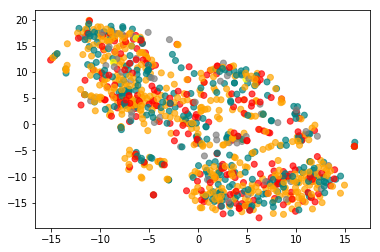

In [183]:
plt.scatter(XX[:,0],XX[:,1], color=df.colors[0:1000], alpha=.7)

In [160]:
df[0:1000]['masterCategory'].value_counts()

Apparel          45
Accessories      27
Footwear         23
Personal Care     5
Name: masterCategory, dtype: int64

In [163]:
colors = {'Apparel':'orange','Accessories':'teal','Footwear':'red', 'Personal Care':'grey', 'Free Items':'yellow', 'Sporting Goods':'black', 'Home':'magenta'}
df['colors'] = df['masterCategory'].apply(lambda x: colors[x])

In [ ]:
Apparel
Accessories
Footwear
Personal Care
Free Items
Sporting Goods
Home